In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")

In [2]:
#load the dataset
data=pd.read_csv('Language Detection.csv')
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [3]:
data['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [4]:
#Independent and dependent features
x=data['Text']
y=data['Language']

In [5]:
import re
lang = []
for text in x:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    lang.append(text)

In [6]:
lang

[' nature  in the broadest sense  is the natural  physical  material world or universe.',
 ' nature  can refer to the phenomena of the physical world  and also to life in general.',
 'the study of nature is a large  if not the only  part of science.',
 'although humans are part of nature  human activity is often understood as a separate category from other natural phenomena.',
 '[ ] the word nature is borrowed from the old french nature and is derived from the latin word natura  or  essential qualities  innate disposition   and in ancient times  literally meant  birth .',
 '[ ] in ancient philosophy  natura is mostly used as the latin translation of the greek word physis  φύσις   which originally related to the intrinsic characteristics that plants  animals  and other features of the world develop of their own accord.',
 '[ ][ ]  the concept of nature as a whole  the physical universe  is one of several expansions of the original notion [ ] it began with certain core applications of th

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(lang).toarray()

In [12]:
x.shape

(10337, 39404)

In [13]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=0)

In [14]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)


GaussianNB()

In [16]:
y_pred = classifier.predict(x_test)

In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[113   0   0   0   0   0   0   0   0   4   0   0   0   0   0   0   0]
 [  0  76   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0]
 [  0   0 104   0   0   0   0   0   0   2   0   0   0   0   0   0   0]
 [  0   0   1 257   0   0   0   0   1   1   0   0   0   0   0   0   0]
 [  0   0   2   0 192   0   0   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0 103   0   0   0   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  70   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0 149   1   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  77   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3 111   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 149   0   1   0   0   0]
 [  0   0   0   1   0   0   0   0   0   3   0   0 137   1   0   0   0]
 [  0   0   0   0   0   0   0   0   2   3   0   4   0 148   0   1   0]
 [  0 

In [18]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
print(ac)

0.9753384912959381


In [34]:
con=pd.crosstab(y_pred,y_test)

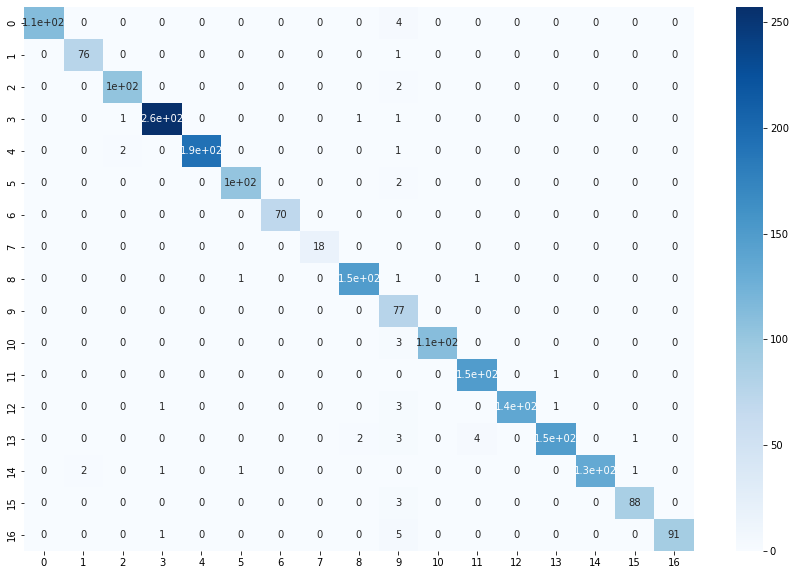

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True, cmap="Blues")
plt.show()

In [38]:
for i in range(con.shape[0]):
    TP=con.iloc[i,i]
    FP=con.iloc[i,:].sum()-TP
    FN=con.iloc[:,i].sum()-TP
    TN=con.sum().sum()-TP-FP-FN
    Accuracy=(TP+TN)/con.sum().sum()
    Precision=TP/(TP+FP)
    Recall=TP/(TP+FN)
    F1_score=(2*Precision*Recall)/(Precision+Recall)
    print(con.index[i],Accuracy, Precision,Recall, F1_score)

Arabic 0.9980657640232108 1.0 0.9658119658119658 0.9826086956521739
Danish 0.9985493230174082 0.9743589743589743 0.987012987012987 0.9806451612903225
Dutch 0.9975822050290135 0.9719626168224299 0.9811320754716981 0.9765258215962441
English 0.9970986460348162 0.9884615384615385 0.9884615384615385 0.9884615384615385
French 0.9985493230174082 1.0 0.9846153846153847 0.9922480620155039
German 0.9980657640232108 0.9809523809523809 0.9809523809523809 0.9809523809523809
Greek 1.0 1.0 1.0 1.0
Hindi 1.0 1.0 1.0 1.0
Italian 0.9970986460348162 0.9802631578947368 0.9802631578947368 0.9802631578947368
Kannada 0.9859767891682786 0.7264150943396226 1.0 0.8415300546448087
Malayalam 0.9985493230174082 1.0 0.9736842105263158 0.9866666666666666
Portugeese 0.9970986460348162 0.9675324675324676 0.9933333333333333 0.9802631578947368
Russian 0.9975822050290135 1.0 0.9647887323943662 0.982078853046595
Spanish 0.9941972920696325 0.9866666666666667 0.9367088607594937 0.961038961038961
Sweedish 0.9975822050290135

In [41]:
from sklearn.metrics import classification_report
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n      Arabic       0.97      1.00      0.98       113\n      Danish       0.99      0.97      0.98        78\n       Dutch       0.98      0.97      0.98       107\n     English       0.99      0.99      0.99       260\n      French       0.98      1.00      0.99       192\n      German       0.98      0.98      0.98       105\n       Greek       1.00      1.00      1.00        70\n       Hindi       1.00      1.00      1.00        18\n     Italian       0.98      0.98      0.98       152\n     Kannada       1.00      0.73      0.84       106\n   Malayalam       0.97      1.00      0.99       111\n  Portugeese       0.99      0.97      0.98       154\n     Russian       0.96      1.00      0.98       137\n     Spanish       0.94      0.99      0.96       150\n    Sweedish       0.96      1.00      0.98       134\n       Tamil       0.97      0.98      0.97        90\n     Turkish       0.94      1.00      0.97        91\n\n    a

In [44]:
pd.DataFrame(classification_report(y_pred,y_test,output_dict=True)).T

,precision,recall,f1-score,support
Arabic,0.965812,1.000000,0.982609,113.000000
Danish,0.987013,0.974359,0.980645,78.000000
Dutch,0.981132,0.971963,0.976526,107.000000
English,0.988462,0.988462,0.988462,260.000000
French,0.984615,1.000000,0.992248,192.000000
German,0.980952,0.980952,0.980952,105.000000
Greek,1.000000,1.000000,1.000000,70.000000
Hindi,1.000000,1.000000,1.000000,18.000000
Italian,0.980263,0.980263,0.980263,152.000000
Kannada,1.000000,0.726415,0.841530,106.000000


In [47]:
import pickle
pickle.dump(cv, open("transform.pkl", "wb"))
pickle.dump(classifier, open("model.pkl", "wb"))